In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(""), "..")))


In [2]:
from tmac import (
    Machine,
    Model,
    Process,
    Protocol,
    Score,
    TableFormat,
    Technology,
    TrustBoundary,
)  # noqa: E402
from tmac.plus import Browser, Database  # noqa: E402


> Users must log in to the website before they can carry out any of the use cases.

In [3]:
model = Model("Demo Model")


In [4]:
internet = TrustBoundary(model, "Internet")
dmz = TrustBoundary(model, "DMZ")
intranet = TrustBoundary(model, "Intranet")


In [5]:
browser = Browser(model, "Browser", trust_boundary=internet)


In [6]:
web_server = Process(
    model,
    "WebServer",
    technology=Technology.WEB_APPLICATION,
    trust_boundary=dmz,
)

database = Database(
    model,
    "Database",
    trust_boundary=intranet,
)


In [7]:
web_traffic = browser.add_data_flow(
    "WebTraffic",
    destination=web_server,
    protocol=Protocol.HTTPS,
)

web_traffic.transfers(
    "UserCredentials",
    confidentiality=Score.HIGH,
    integrity=Score.HIGH,
    availability=Score.HIGH,
)


In [8]:
database_traffic = web_server.add_data_flow(
    "DatabaseTraffic",
    destination=database,
    protocol=Protocol.SQL,
)

database_traffic.transfers(
    "UserDetails",
    confidentiality=Score.HIGH,
    integrity=Score.HIGH,
    availability=Score.HIGH,
)


In [9]:
print(model.create_risks_table())


┌──────────────────────┬────────────────┬─────────────────────────────────────────────────────────────────────────────────┐
│ ID                   │ Category       │ Risk                                                                            │
├──────────────────────┼────────────────┼─────────────────────────────────────────────────────────────────────────────────┤
│ CAPEC-62@WebServer@W │ Subvert Access │ Cross-Site Request Forgery (CSRF) risk at WebServer via WebTraffic from Browser │
│ ebTraffic            │ Control        │                                                                                 │
├──────────────────────┼────────────────┼─────────────────────────────────────────────────────────────────────────────────┤
│ CAPEC-63@WebServer   │ Inject         │ Cross-Site Scripting (XSS) risk at WebServer                                    │
│                      │ Unexpected     │                                                                                 │
│       

In [10]:
print(model.create_backlog_table())


┌──────────────────────┬─────────────────┬──────────────────────────────────────────────────────────────────────────────────┬─────────┐
│ ID                   │ Category        │ User Story                                                                       │ State   │
├──────────────────────┼─────────────────┼──────────────────────────────────────────────────────────────────────────────────┼─────────┤
│ ASVS-13.2.3@CAPEC-62 │ RESTful Web     │ Verify that RESTful web services that utilize cookies are protected from Cross-  │ draft   │
│ @WebServer@WebTraffi │ Service         │ Site Request Forgery via the use of at least one or more of the following:       │         │
│ c                    │                 │ double submit cookie pattern, CSRF nonces, or Origin request header checks.      │         │
├──────────────────────┼─────────────────┼──────────────────────────────────────────────────────────────────────────────────┼─────────┤
│ ASVS-5.3.5@CAPEC-66@ │ Output Encoding │ Verif

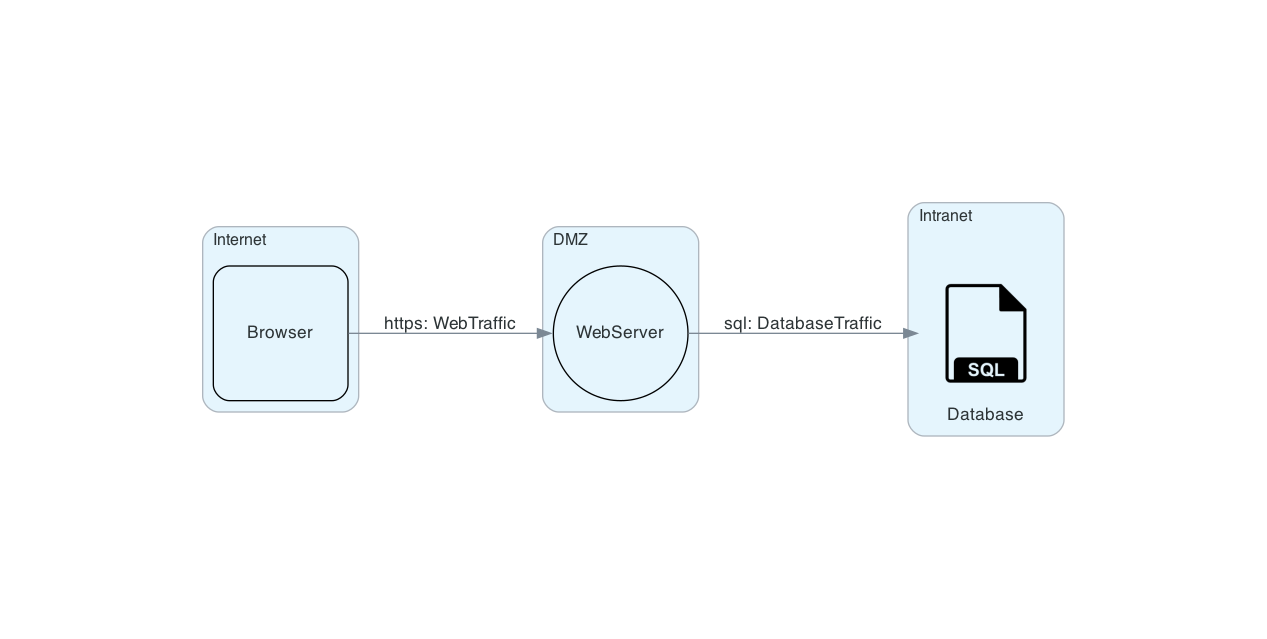

In [11]:
model.create_data_flow_diagram()
